<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/21_Neural_Nets_and_Deep_Learning_part_4_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras API Project Exercise**

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Starter Code**

In [ ]:
data_info = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/lending_club_info.csv", index_col='LoanStatNew')

In [ ]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


**Loading the data**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/lending_club_loan_two.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Section 1: Exploratory Data Analysis**



TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.

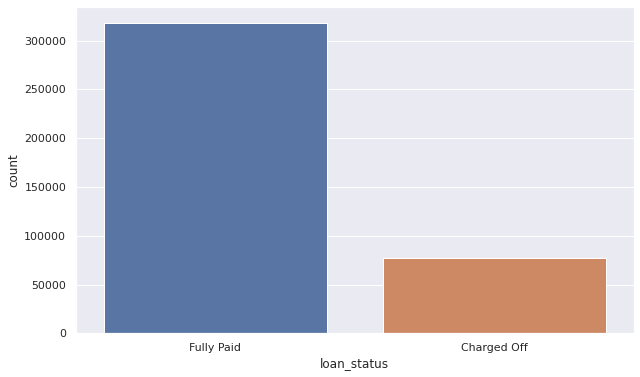

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status',data=df)
plt.show()

TASK: Create a histogram of the loan_amnt column

In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


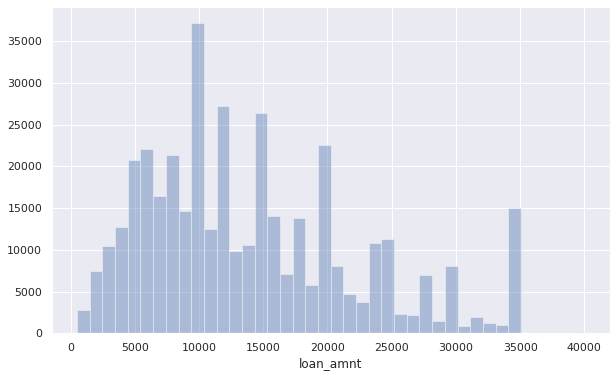

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.show()


TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035



TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.

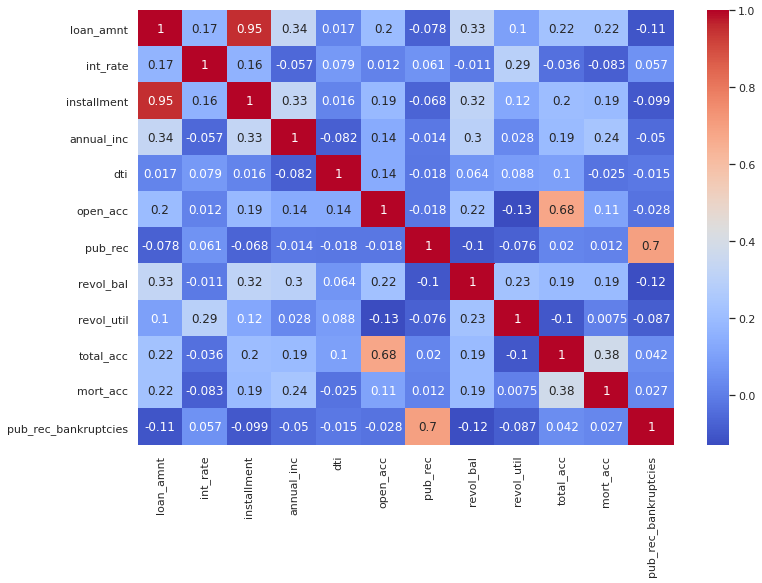

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()


TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


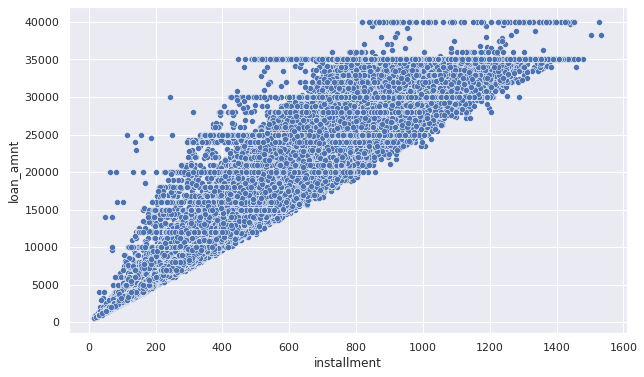

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "installment", y = "loan_amnt", data = df)
plt.show()

TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.

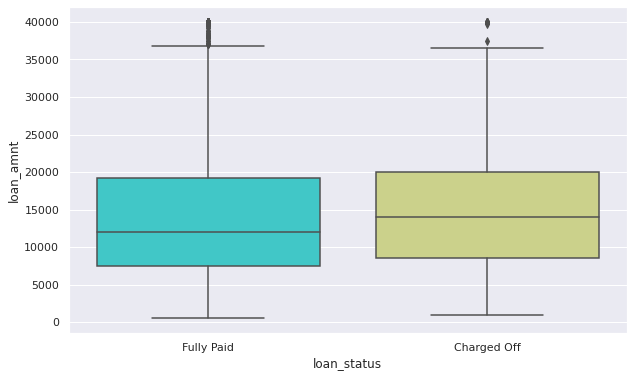

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='rainbow')
plt.show()


TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0



TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [ ]:
sorted(list(pd.unique(df['grade'])))

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
sorted(list(pd.unique(df['sub_grade'])))

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']


TASK: Create a countplot per grade. Set the hue to the loan_status label.

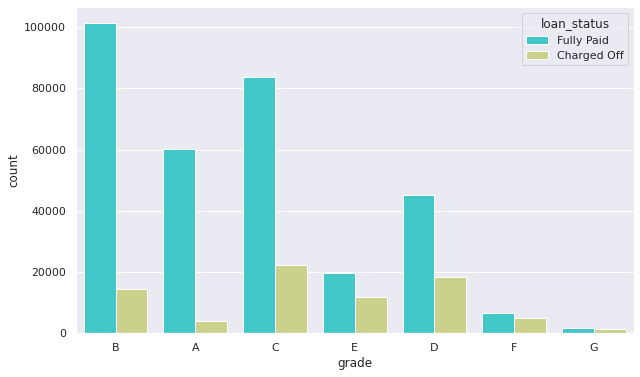

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', hue='loan_status', data=df, palette='rainbow')
plt.show()

In [ ]:
#verificar indice de mal-pagadores em relação ao total, por nota
df[df['loan_status'] == 'Charged Off']['grade'].value_counts()/df['grade'].value_counts()

A    0.062879
B    0.125730
C    0.211809
D    0.288678
E    0.373634
F    0.427880
G    0.478389
Name: grade, dtype: float64

TASK: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"

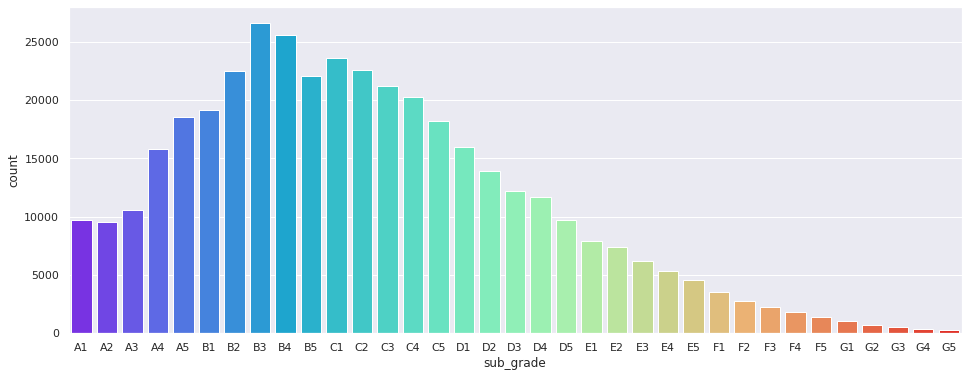

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='sub_grade', data=df, palette='rainbow', order=sorted(list(pd.unique(df['sub_grade']))))
plt.show()

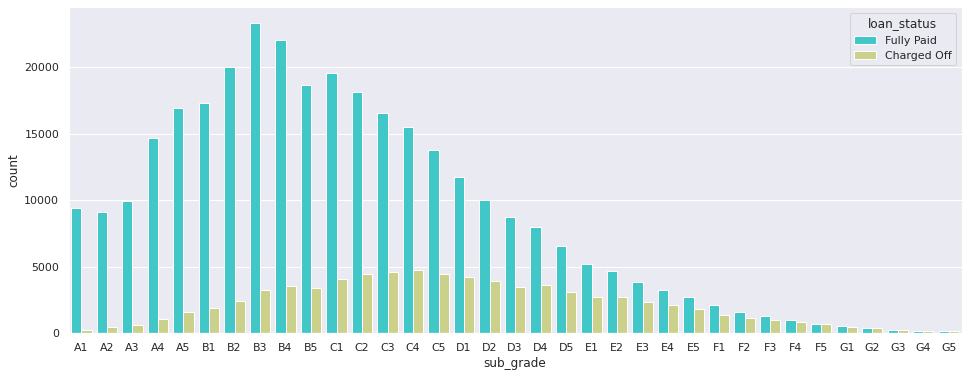

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status', palette='rainbow', order=sorted(list(pd.unique(df['sub_grade']))))
plt.show()

TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

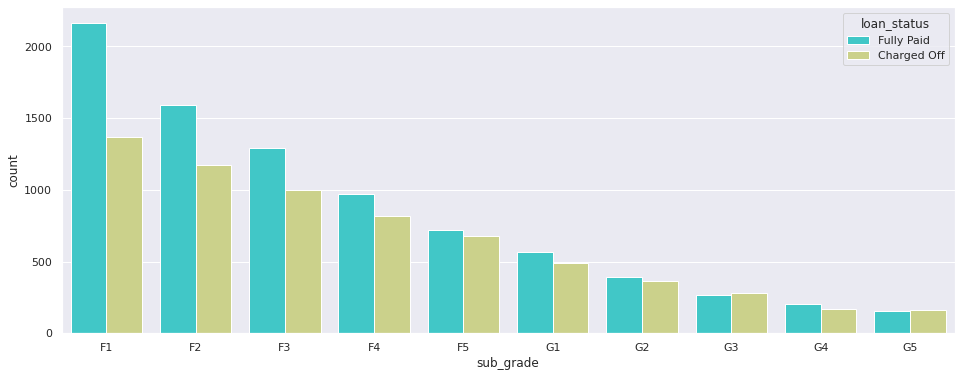

In [ ]:
aux_df = df[(df['grade'] == 'F')|(df['grade'] == 'G')]
plt.figure(figsize=(16,6))
sns.countplot(x='sub_grade', data=aux_df, hue='loan_status', palette='rainbow', order=sorted(list(pd.unique(aux_df['sub_grade']))))
plt.show()


TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [ ]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid



CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. Helpful Link

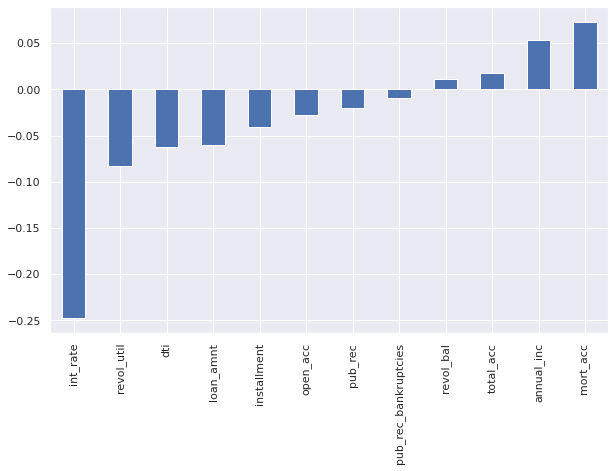

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')
plt.show()

**Section 2: Data PreProcessing**

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0



TASK: What is the length of the dataframe?

In [ ]:
df.shape[0]

396030

TASK: Create a Series that displays the total count of missing values per column.

In [ ]:
#criando uma função para mostrar os missing values, pois vai usar varias vezes
def show_miss_data():
  aux_list = []
  for i in df.columns:
    aux_list.append(sum(df[i].isnull()))

  return pd.Series(data=aux_list, index=df.columns)

In [ ]:
show_miss_data()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64


TASK: Convert this Series to be in term of percentage of the total DataFrame

In [ ]:
show_miss_data().apply(lambda x: (x/df.shape[0])*100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.

In [ ]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


TASK: How many unique employment job titles are there?

In [ ]:
df['emp_title'].value_counts().size

173105

In [ ]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
Pediatric Emergency Physician       1
city of baltimore                   1
Sr. System Eng                      1
Radian                              1
Owner/ stylist                      1
Name: emp_title, Length: 173105, dtype: int64


TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [ ]:
df.drop('emp_title', axis=1, inplace=True)


TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.

In [ ]:
newlist=sorted(list(pd.unique(df['emp_length'].dropna().apply(str))))
newlist

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
#reorganizando a lista
newlist[0], newlist[1] = newlist[1], newlist[0]
newlist[0], newlist[10] = newlist[10], newlist[0]
newlist

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

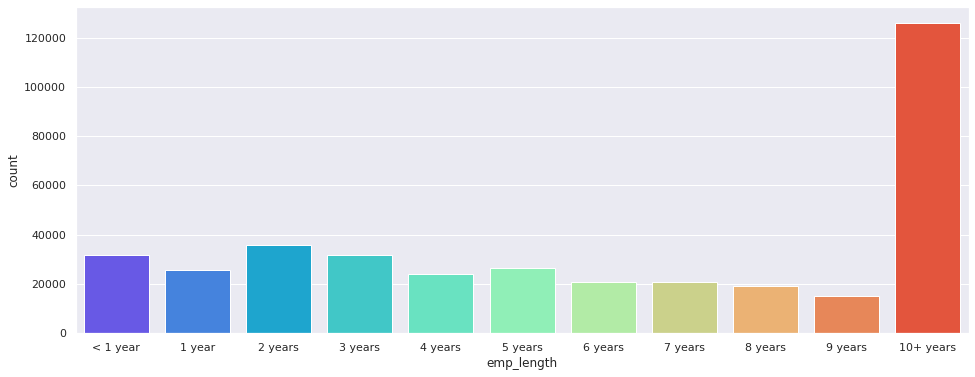

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='emp_length', data=df, palette='rainbow', order=newlist)
plt.show()


TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off

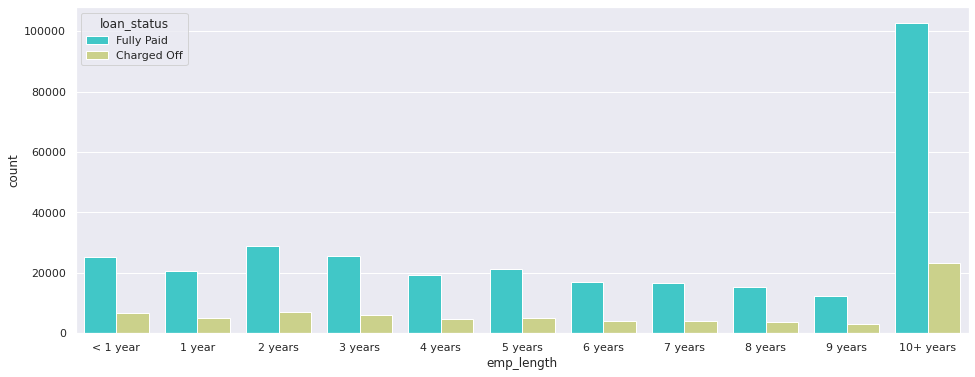

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='emp_length', data=df, hue='loan_status', palette='rainbow', order=newlist)
plt.show()

CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a bar plot. This may be tricky, refer to solutions if you get stuck on creating this Series.

In [ ]:
auxdf = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()/df['emp_length'].value_counts()

In [ ]:
auxdf

1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: emp_length, dtype: float64

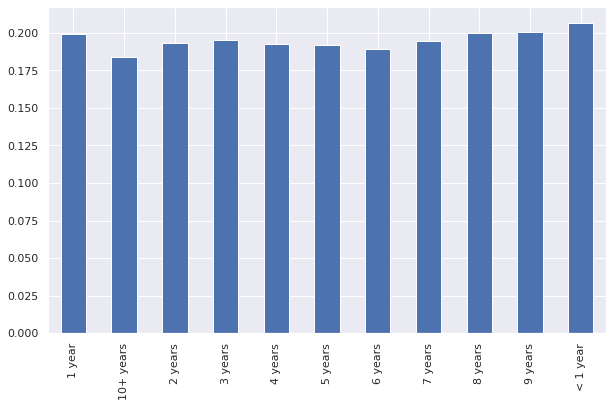

In [ ]:
plt.figure(figsize=(10,6))
auxdf.sort_index().plot(kind='bar')
plt.show()

TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.

In [ ]:
df.drop('emp_length', axis=1, inplace=True)


TASK: Revisit the DataFrame to see what feature columns still have missing data.

In [ ]:
show_miss_data()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64


TASK: Review the title column vs the purpose column. Is this repeated information?

In [ ]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object


TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.

In [ ]:
df.drop('title', axis=1, inplace=True)



NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.

TASK: Find out what the mort_acc feature represents

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.



TASK: Create a value_counts of the mort_acc column.

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64


TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64


TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [ ]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [ ]:
df['total_acc'].value_counts().sort_index()

2.0        18
3.0       327
4.0      1238
5.0      2028
6.0      2923
         ... 
124.0       1
129.0       1
135.0       1
150.0       1
151.0       1
Name: total_acc, Length: 118, dtype: int64

In [ ]:
seraux = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
seraux

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.

In [ ]:
#definindo a função de preenchimento
def input_mort_acc(cols):
  mort = cols[0]
  total = cols[1]
  
  if pd.isnull(mort):
    return round(seraux[total])
  else:
    return mort

In [ ]:
df['mort_acc'] = df[['mort_acc','total_acc']].apply(input_mort_acc, axis=1)

In [ ]:
show_miss_data()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
df['mort_acc'].value_counts().head(10)

0.0    145213
1.0     73906
2.0     62421
3.0     44417
4.0     27915
5.0     18194
6.0     11069
7.0      6052
8.0      3121
9.0      1656
Name: mort_acc, dtype: int64


TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().

In [ ]:
df.shape

(396030, 25)

In [ ]:
df.dropna(axis = 0, inplace=True)

In [ ]:
df.shape

(395219, 25)

In [ ]:
show_miss_data()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64


**Categorical Variables and Dummy Variables** 

We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

TASK: List all the columns that are currently non-numeric

In [ ]:
nomnumeric = []
for col in df.columns:
  if df[col].dtype == object:
    nomnumeric.append(df[col].name)
        
nomnumeric

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']



Let's now go through all the string features to see what we should do with them.

TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda tr: 36 if '36' in tr else 60)

In [ ]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

TASK: We already know grade is part of sub_grade, so just drop the grade feature.

In [ ]:
df.drop('grade', axis=1, inplace=True)

TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [ ]:
sgrade = pd.get_dummies(df['sub_grade'],drop_first=True)
df.drop('sub_grade', axis=1, inplace=True)
df = pd.concat([df,sgrade],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [ ]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [ ]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [ ]:
vs = pd.get_dummies(df['verification_status'],drop_first=True)
at = pd.get_dummies(df['application_type'],drop_first=True)
ils = pd.get_dummies(df['initial_list_status'],drop_first=True)
pur = pd.get_dummies(df['purpose'],drop_first=True)
df.drop(['verification_status','application_type','initial_list_status','purpose'], axis=1, inplace=True)
df = pd.concat([df,vs,at,ils,pur],axis=1)

TASK:Review the value_counts for the home_ownership column.

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64


TASK: Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [ ]:
def other(word):
  if (word == 'ANY') or (word == 'NONE'):
    return 'OTHER'
  else:
    return word
df['home_ownership'] = df['home_ownership'].apply(other)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
ho = pd.get_dummies(df['home_ownership'],drop_first=True)
df.drop('home_ownership', axis=1, inplace=True)
df = pd.concat([df,ho],axis=1)

TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [ ]:
def get_zip(address):
  lst = address.split()
  return lst[len(lst) - 1]
df['zip_code'] = df['address'].apply(get_zip)

In [ ]:
df[['address','zip_code']].head()

,address,zip_code
0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113
3,"823 Reid Ford\nDelacruzside, MA 00813",00813
4,"679 Luna Roads\nGreggshire, VA 11650",11650



TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [ ]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [ ]:
adr = pd.get_dummies(df['zip_code'],drop_first=True)
df.drop(['zip_code','address'], axis=1, inplace=True)
df = pd.concat([df,adr],axis=1)

TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [ ]:
df.drop('issue_d', axis=1, inplace=True)

TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df[ 'earliest_cr_year'] = df['earliest_cr_line'].apply(lambda tm: int(tm.year))
df.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


**Train Test Split**



TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [ ]:
df.drop('loan_status', axis=1, inplace=True)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

**Scaling Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Creating the Model**


TASK: import the necessary Keras functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding Dropout layers 1 2

In [ ]:
model = Sequential()
#a primeira camada tem 78 neuronios pois são 78 colunas de dados que serão alimentados
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.5))#metade dos neuronios dessa camada serão desligados aleatoriamente durante o treino, serve para evitar overfitting
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.5))#metade dos neuronios dessa camada serão desligados aleatoriamente durante o treino, serve para evitar overfitting
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) 

# For a binary classification problem
model.compile(optimizer='adam' ,loss='binary_crossentropy')

TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#Monitorando a curva "val loss"
#mode='min' pois a variavel se trata de algo que queremos minimizar
#patience=5 pois apos detectar o "val loss" minimo, vai deixar passar mais 5 epochs antes de parar o treino
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train, 
          y=y_train,
          batch_size=256, 
          epochs=50,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop])

Epoch 1/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.3889 - val_loss: 0.2665
Epoch 2/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2712 - val_loss: 0.2648
Epoch 3/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2646 - val_loss: 0.2639
Epoch 4/50
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2631 - val_loss: 0.2638
Epoch 5/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2615 - val_loss: 0.2637
Epoch 6/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2625 - val_loss: 0.2637
Epoch 7/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2612 - val_loss: 0.2631
Epoch 8/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2605 - val_loss: 0.2625
Epoch 9/50
1158/1158 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2625
Epoch 10/50
1158/1158 [==============================] - 4s 4ms/step - loss: 0.258


**Section 3: Evaluating Model Performance.**


TASK: Plot out the validation loss versus the training loss.

In [ ]:
losses = pd.DataFrame(model.history.history)

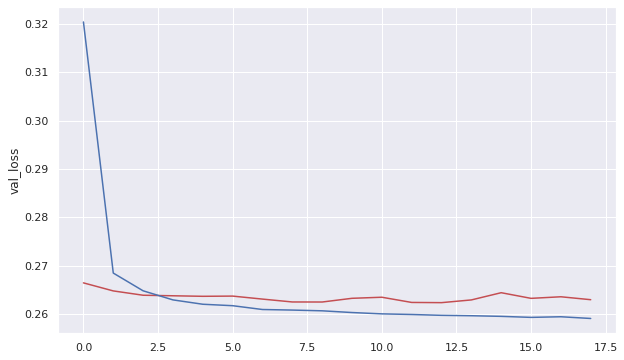

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=losses, x= losses.index, y="val_loss",color='r')
sns.lineplot(data=losses, x= losses.index, y="loss", color='b')
plt.show()

TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [ ]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.94      0.71      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 8303 11155]
 [    0 79347]]


interpretação dos resultados:

-o modelo considerou que 90502 clientes eram bom-pagadores, sendo que apenas
79347 realmenta eram bom-pagadores.

-porem todos o 8303 que foram indicados como mal-pagadores, realmente eram
mal pagadores! Não houve falso-negativo!

-Conclusão: É um otimo modelo para indicar mal-pagadores! Se o modelo disse que tal cliente sera mal-pagador, então NÃO se deve conceder o emprestimo para ele, pois 100% de chance de o mesmo ser mal-pagador. Agora se o modelo disse que o cliente sera um bom pagador, ainda existe 12% de chances de ele ser mal-pagador (11155/(11155 + 79347)). Porem 12% de erro ainda é algo aceitavel, então podemos
dizem que é um bom modelo de previsão.

**Saving and Loading a Model**

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/loan_model.h5')
later_model = load_model('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/loan_model.h5')


TASK: Given the customer below, would you offer this person a loan?

In [ ]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            4000.00
term                   36.00
int_rate               15.61
installment           139.86
annual_inc          61000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1998.00
Name: 136478, Length: 78, dtype: float64

In [ ]:
new_customer_s = scaler.transform(new_customer.values.reshape(1,78))
pred = model.predict_classes(new_customer_s)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred

array([[1]], dtype=int32)

TASK: Now check, did this person actually end up paying back their loan?

In [ ]:
df['loan_repaid'].iloc[random_ind]

1

prevendo com o modelo salvo

In [ ]:
later_model.predict(new_customer_s)

array([[0.99999964]], dtype=float32)